
📊 Processing Memory Utilization with Simple Isolation Forest:
  🔍 MEMORY STRESS:
    ✅ Cleaned 9 outliers (1.9%) using 1 original features
  🔍 BASELINE:
    ✅ Cleaned 8 outliers (1.6%) using 1 original features

📊 Processing Memory Cache with Simple Isolation Forest:
  🔍 MEMORY STRESS:
    ✅ Cleaned 8 outliers (1.7%) using 1 original features
  🔍 BASELINE:
    ✅ Cleaned 8 outliers (1.6%) using 1 original features

📊 Processing Memory Available with Simple Isolation Forest:
  🔍 MEMORY STRESS:
    ✅ Cleaned 9 outliers (1.9%) using 1 original features
  🔍 BASELINE:
    ✅ Cleaned 8 outliers (1.6%) using 1 original features

COMPREHENSIVE MEMORY PERFORMANCE UNDER MEMORY STRESS ANALYSIS - WITH ORIGINAL PLOTS

🔄 Analyzing Memory Utilization memory performance under Memory Stress...

📊 Plotting original memory data under memory stress for Memory Utilization...


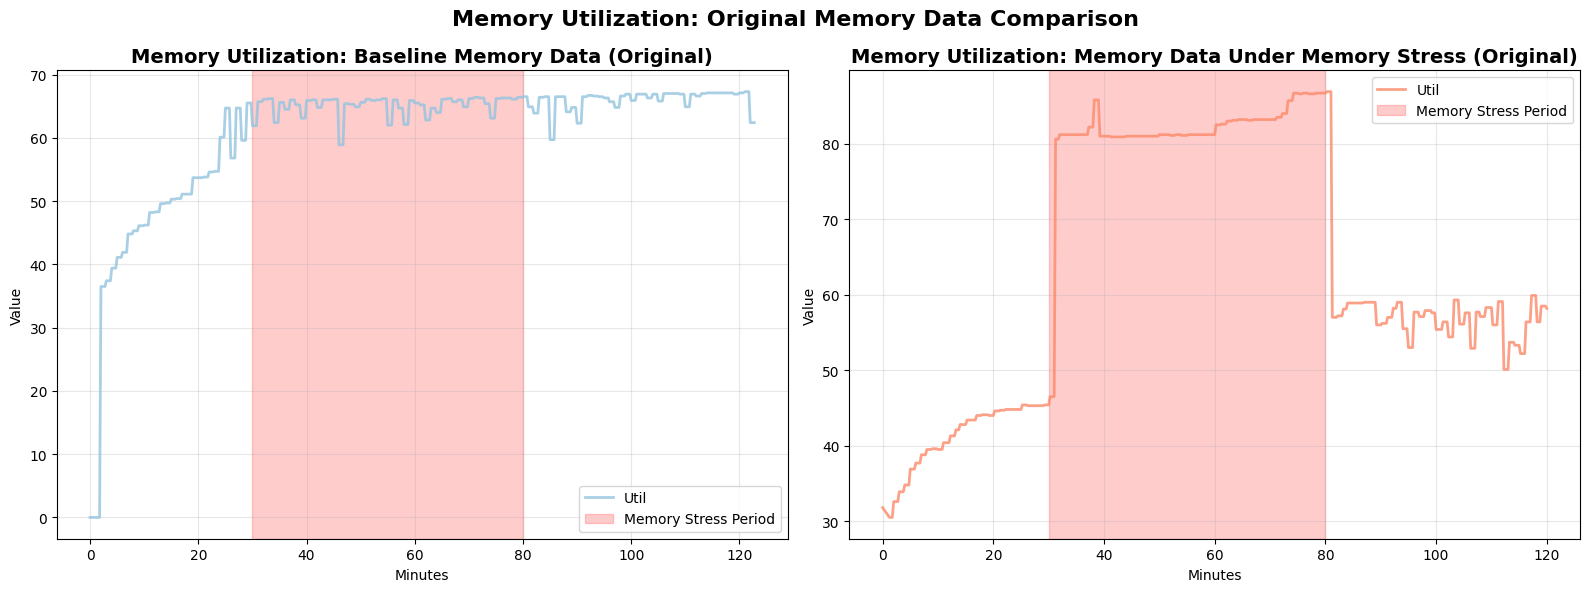

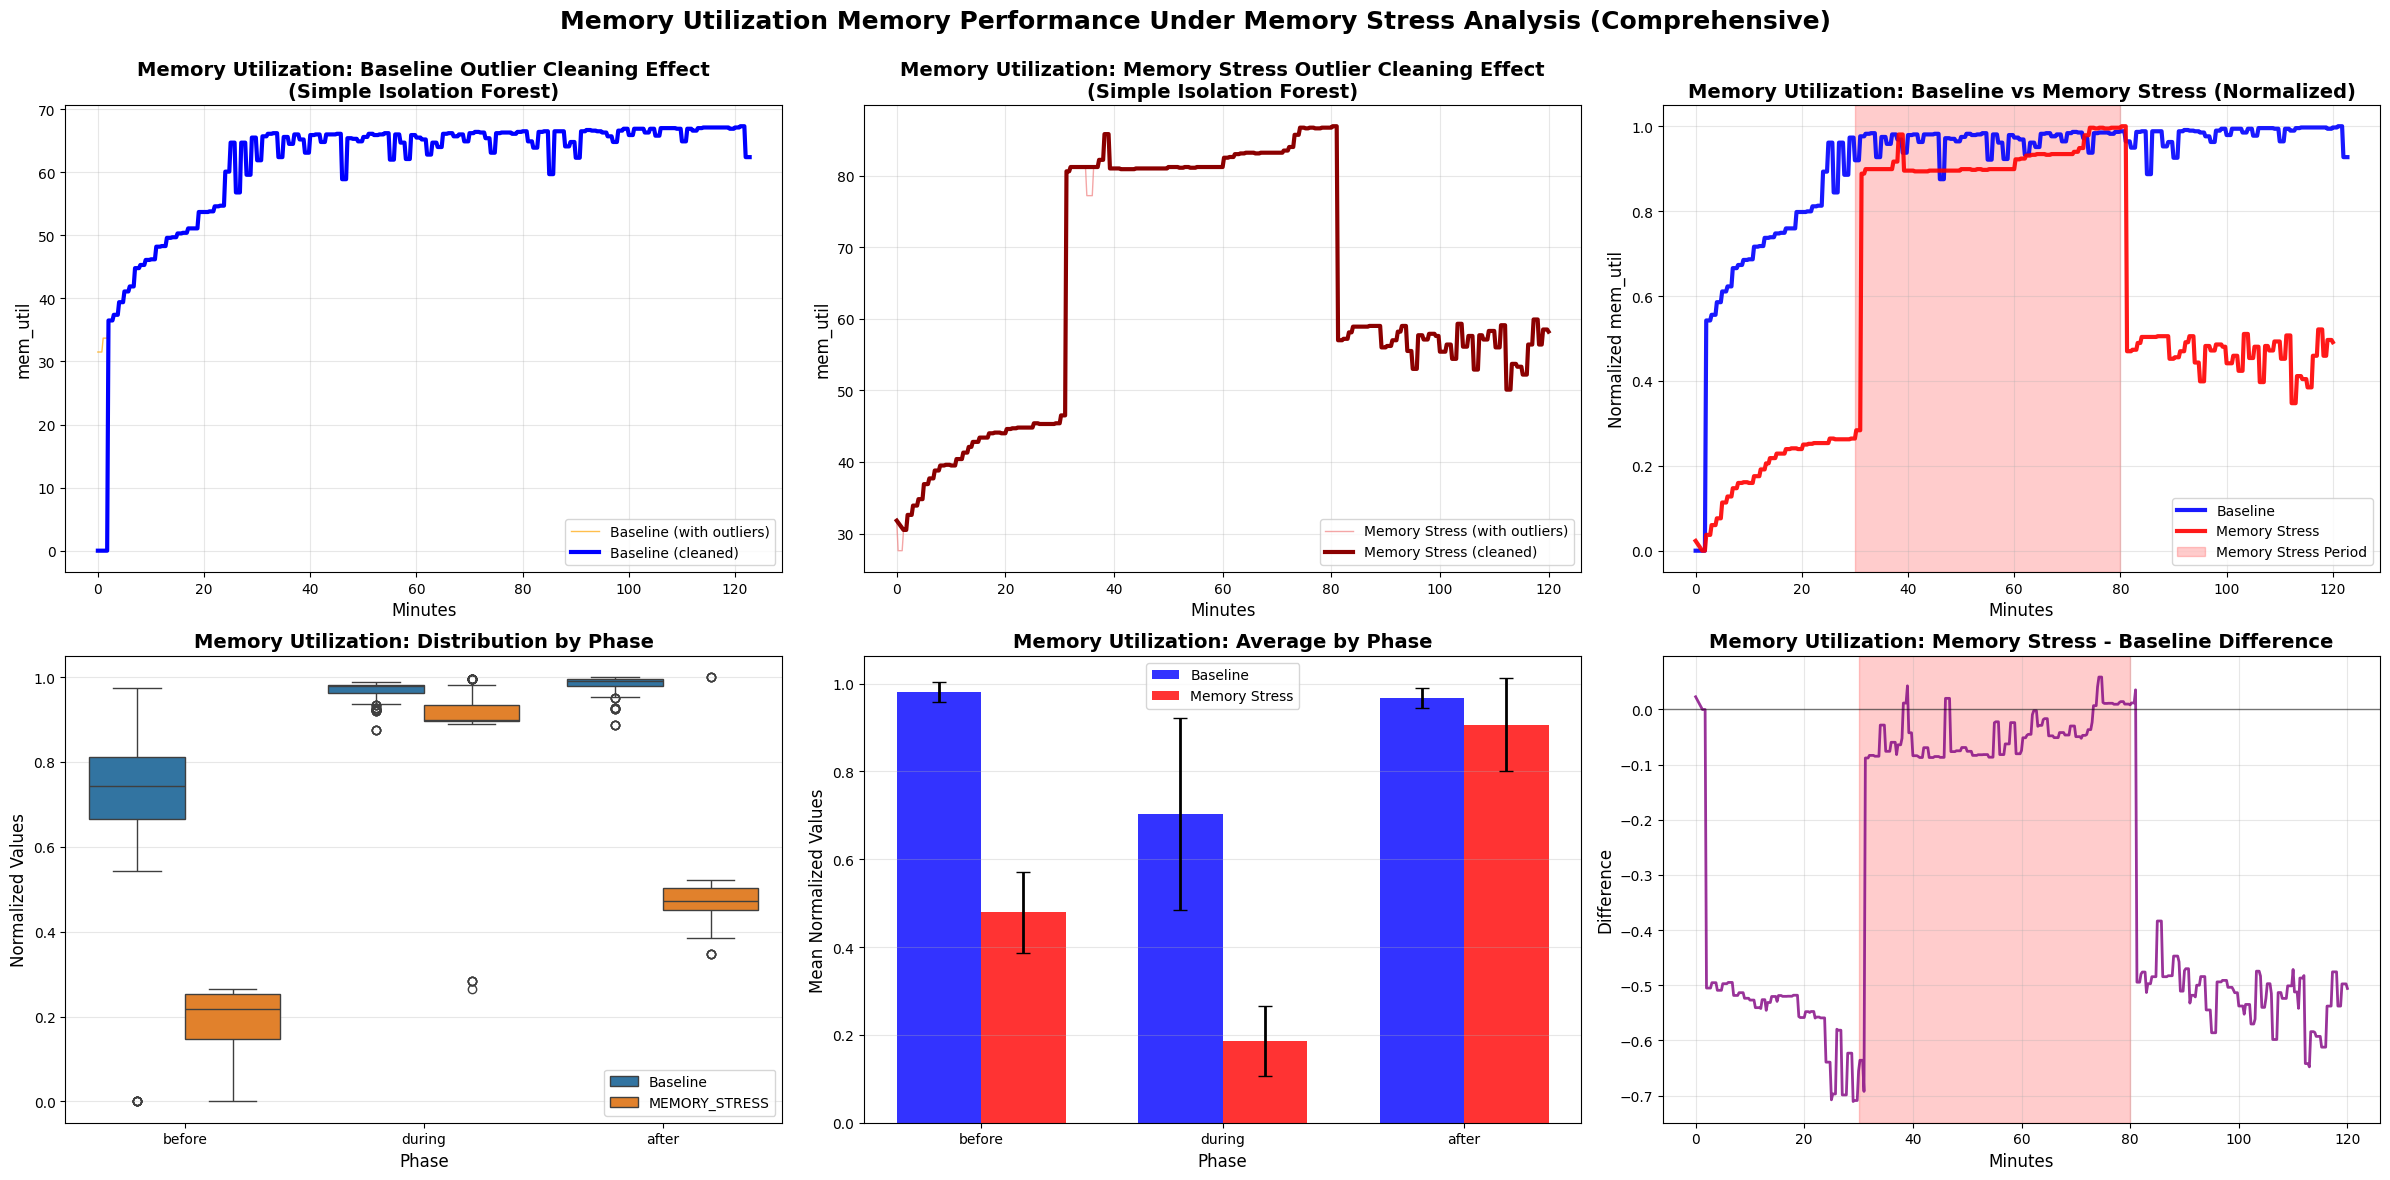


MEMORY UTILIZATION MEMORY - MEMORY STRESS ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9813  0.0230  0.8871  1.0000
before  0.7030  0.2191  0.0000  0.9733
during  0.9678  0.0229  0.8752  0.9881

📊 MEMORY STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.4788  0.0924  0.3475  1.0000
before  0.1863  0.0799  0.0000  0.2642
during  0.9065  0.1061  0.2642  0.9965

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= 24.27, p=  0.0000 (✅ SIGNIFICANT)
  DURING  : t=  8.00, p=  0.0000 (✅ SIGNIFICANT)
  AFTER   : t= 68.88, p=  0.0000 (✅ SIGNIFICANT)

📈 MEMORY STRESS IMPACT ON MEMORY PERFORMANCE (% CHANGE):
  BEFORE  :  -73.49% (↘️ DECREASE)
  DURING  :   -6.33% (↘️ DECREASE)
  AFTER   :  -51.21% (↘️ DECREASE)

📋 MEMORY METRICS SUMMARY:
  Numeric columns found: ['mem_util']
  Main metric analyzed: mem_util
  Total metrics: 1

🔄 Analyzing Memo

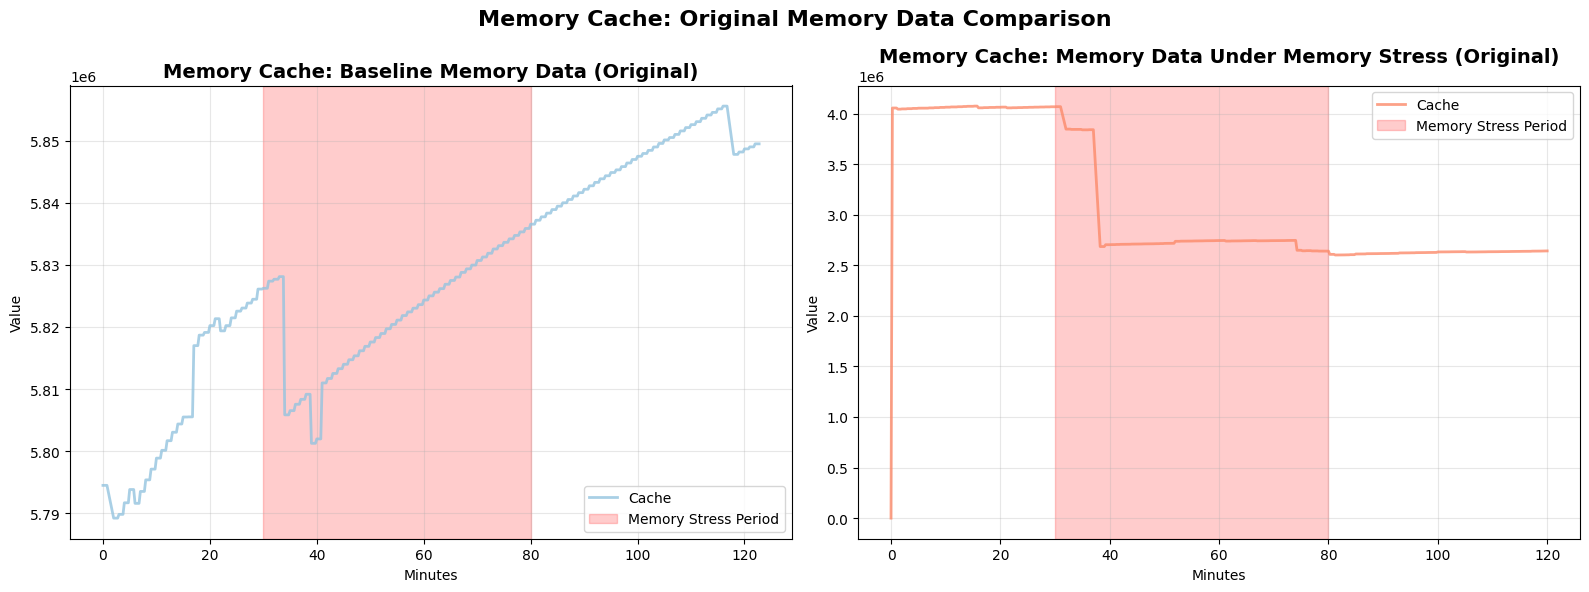

  📦 Using CACHE-SPECIFIC analysis (no harmful normalization)
🔍 PROPER CACHE ANALYSIS FOR Memory Cache
📊 Analyzing cache metric: mem_cache

CACHE ANALYSIS RESULTS (ABSOLUTE VALUES)

📊 BASELINE CACHE STATISTICS (KB):
             mean      std        min        max  count
phase                                                  
after   5846739.0   5294.0  5836532.0  5855536.0    171
before  5807500.0  12920.0  5789228.0  5826088.0    120
during  5821813.0   9308.0  5801264.0  5836532.0    201

📊 MEMORY STRESS CACHE STATISTICS (KB):
             mean       std        min        max  count
phase                                                   
after   2626012.0   11464.0  2601896.0  2642248.0    160
before  4026698.0  370738.0        0.0  4074400.0    120
during  2897956.0  421067.0  2640320.0  4068976.0    201

🔬 STATISTICAL SIGNIFICANCE:
  BEFORE  : t= 52.59, p=  0.0000 (✅ SIGNIFICANT)
  DURING  : t= 98.42, p=  0.0000 (✅ SIGNIFICANT)
  AFTER   : t=3315.51, p=  0.0000 (✅ SIGNIFICANT)

📈 

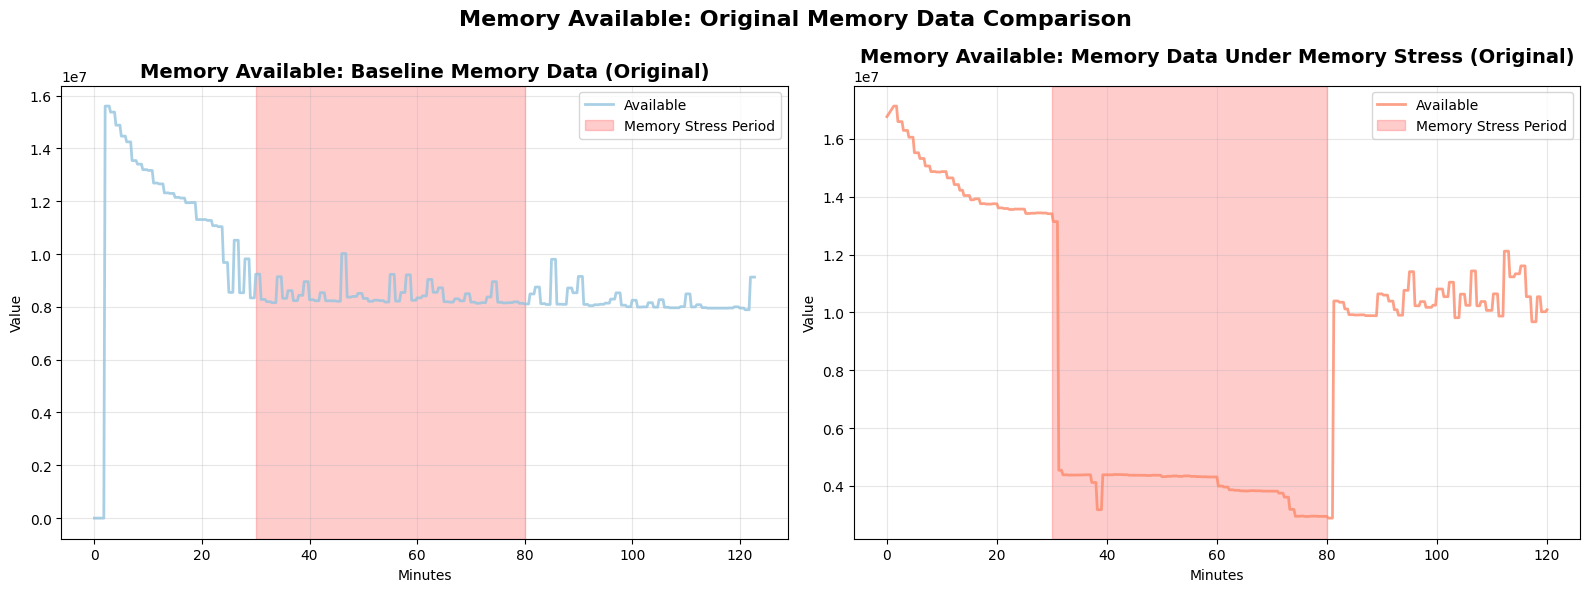

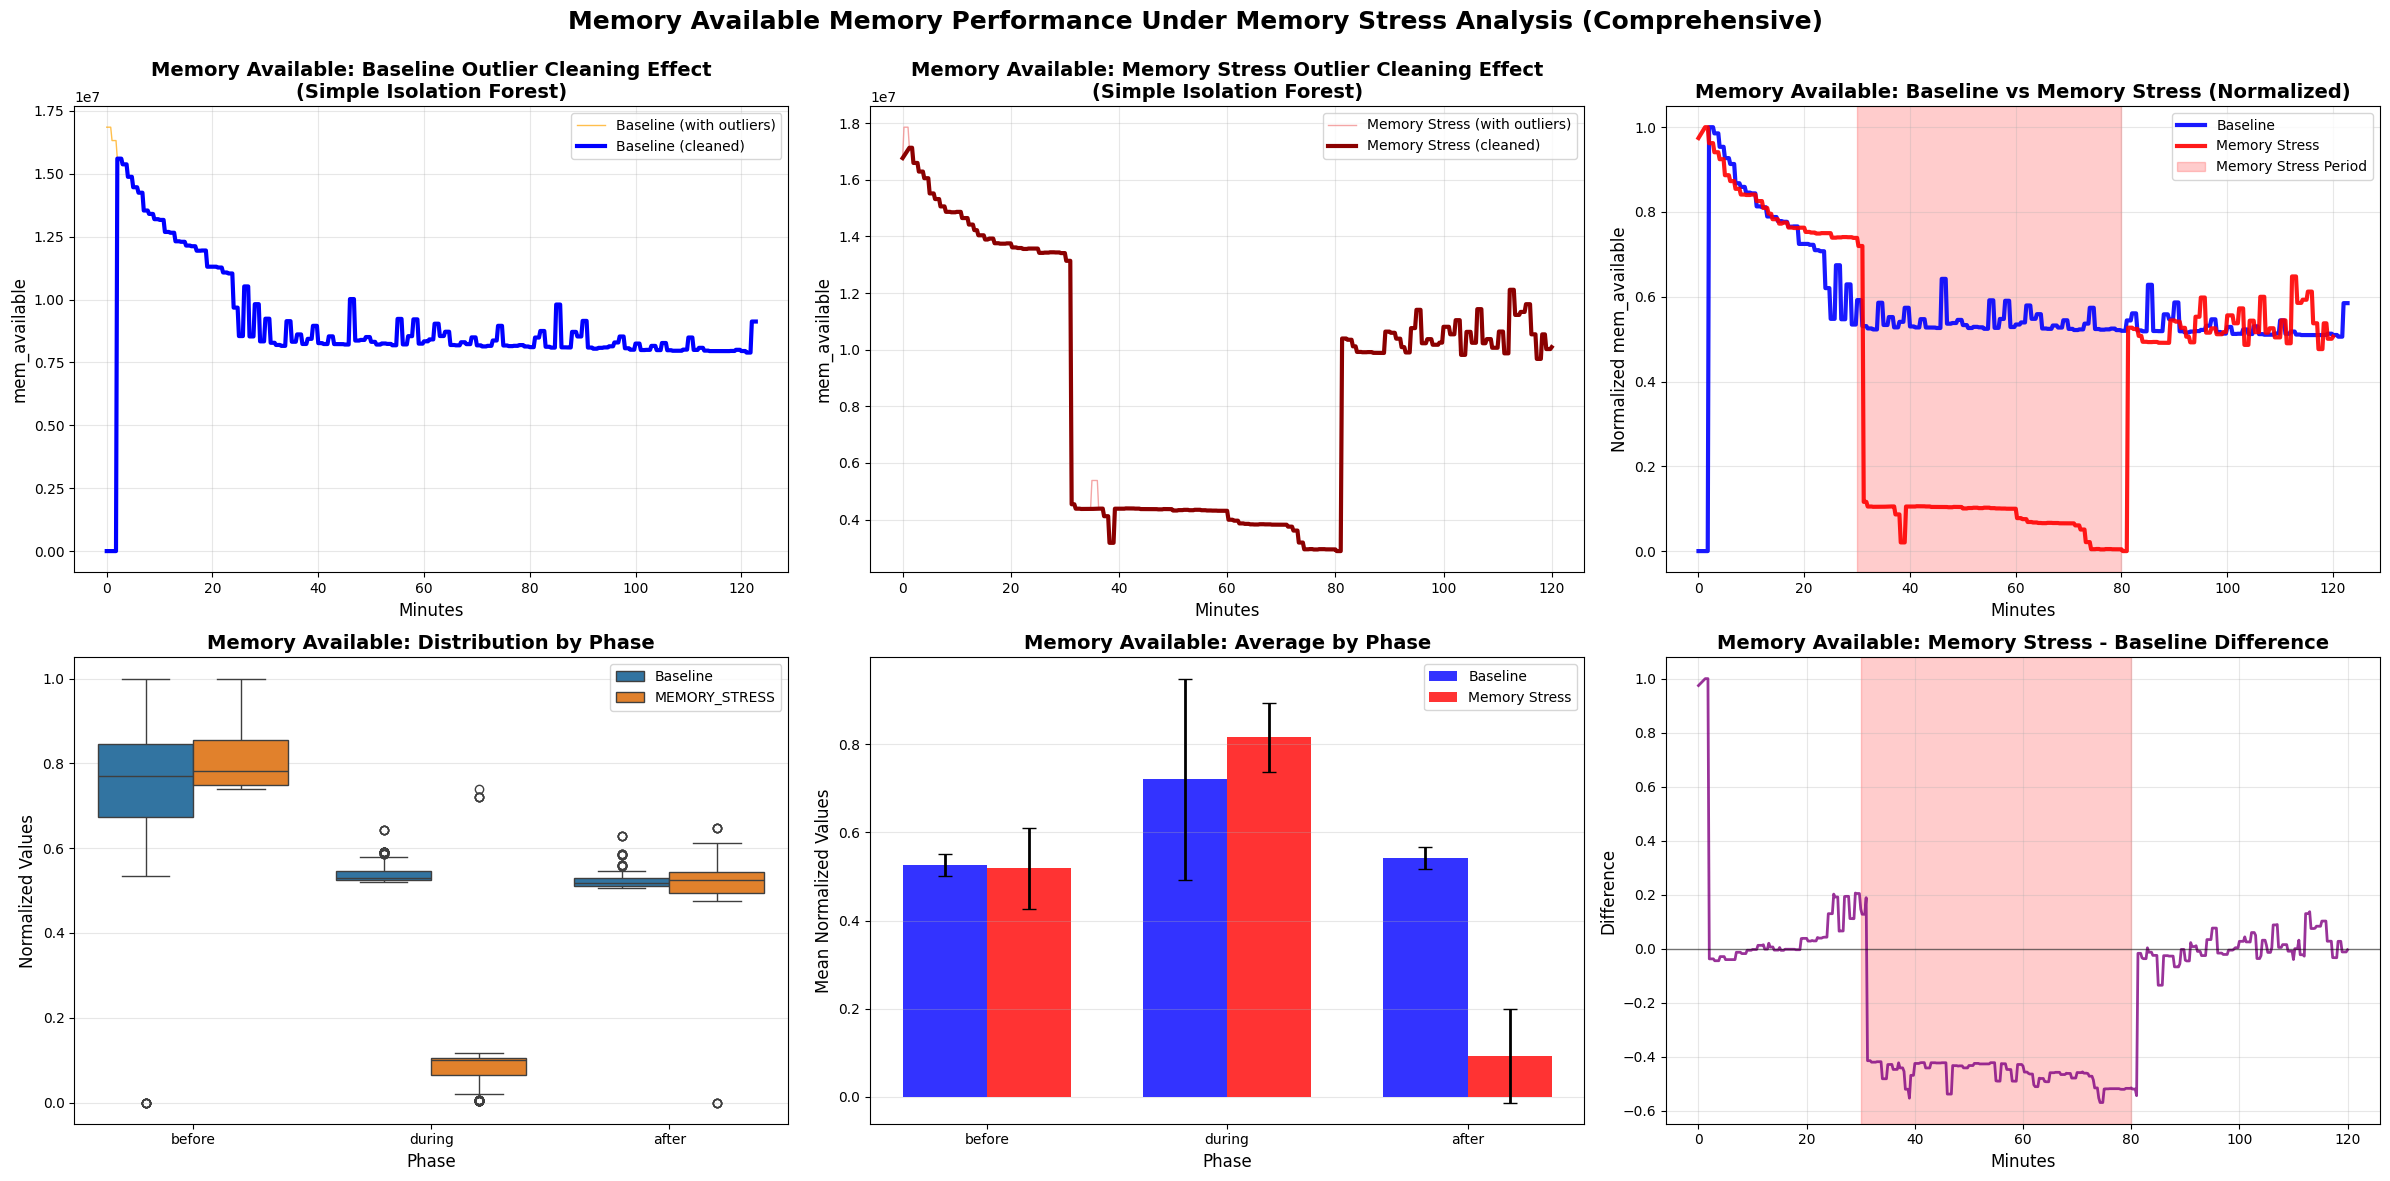


MEMORY AVAILABLE MEMORY - MEMORY STRESS ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.5265  0.0249  0.5058  0.6282
before  0.7209  0.2279  0.0000  1.0000
during  0.5412  0.0248  0.5197  0.6422

📊 MEMORY STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.5183  0.0919  0.0000  0.6479
before  0.8155  0.0787  0.7388  1.0000
during  0.0939  0.1065  0.0040  0.7388

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -4.30, p=  0.0000 (✅ SIGNIFICANT)
  DURING  : t= 57.97, p=  0.0000 (✅ SIGNIFICANT)
  AFTER   : t=  1.12, p=  0.2635 (❌ NOT SIGNIFICANT)

📈 MEMORY STRESS IMPACT ON MEMORY PERFORMANCE (% CHANGE):
  BEFORE  :  +13.12% (↗️ INCREASE)
  DURING  :  -82.65% (↘️ DECREASE)
  AFTER   :   -1.55% (↘️ DECREASE)

📋 MEMORY METRICS SUMMARY:
  Numeric columns found: ['mem_available']
  Main metric analyzed: mem_available
  Total metrics: 1

COMP

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as scipy_stats
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load all memory datasets
df_mem_util = pd.read_csv("mem_util.csv")
df_mem_cache = pd.read_csv("mem_cache.csv")
df_mem_available = pd.read_csv("mem_available.csv")

df_baseline_mem_util = pd.read_csv("../../baseline/memory related/mem_util.csv")
df_baseline_mem_cache = pd.read_csv("../../baseline/memory related/mem_cache.csv")
df_baseline_mem_available = pd.read_csv("../../baseline/memory related/mem_available.csv")

# Add source labels for MEMORY STRESS experiment
df_mem_util["source"] = "MEMORY_STRESS"
df_mem_cache["source"] = "MEMORY_STRESS"
df_mem_available["source"] = "MEMORY_STRESS"

df_baseline_mem_util["source"] = "BASELINE"
df_baseline_mem_cache["source"] = "BASELINE"
df_baseline_mem_available["source"] = "BASELINE"

# Convert to datetime
df_mem_util["Time"] = pd.to_datetime(df_mem_util["Time"])
df_mem_cache["Time"] = pd.to_datetime(df_mem_cache["Time"])
df_mem_available["Time"] = pd.to_datetime(df_mem_available["Time"])

df_baseline_mem_util["Time"] = pd.to_datetime(df_baseline_mem_util["Time"])
df_baseline_mem_cache["Time"] = pd.to_datetime(df_baseline_mem_cache["Time"])
df_baseline_mem_available["Time"] = pd.to_datetime(df_baseline_mem_available["Time"])

delay = 30
duration = 50

# Synchronize test datasets with baseline timeline
time_offset = df_baseline_mem_util["Time"].min() - df_mem_util["Time"].min()
df_mem_util["Time"] += time_offset
df_mem_cache["Time"] += time_offset
df_mem_available["Time"] += time_offset

# Convert timeline to minutes
all_dfs = [
    df_mem_util, df_mem_cache, df_mem_available,
    df_baseline_mem_util, df_baseline_mem_cache, df_baseline_mem_available
]

for df in all_dfs:
    df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

# STORE ORIGINAL DATASETS BEFORE CLEANING
original_datasets = {
    'Memory Utilization': {'memory_stress': df_mem_util.copy(), 'baseline': df_baseline_mem_util.copy()},
    'Memory Cache': {'memory_stress': df_mem_cache.copy(), 'baseline': df_baseline_mem_cache.copy()},
    'Memory Available': {'memory_stress': df_mem_available.copy(), 'baseline': df_baseline_mem_available.copy()}
}

# SIMPLE ISOLATION FOREST OUTLIER DETECTION FOR MEMORY METRICS
def remove_outliers_isolation_forest_memory(df, contamination=0.02):
    """Simple Isolation Forest outlier detection - uses only original numeric columns"""
    df_clean = df.copy()
    outlier_stats = {}
    
    # Get all numeric columns except Time, Minutes, and source
    numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
                   if col not in ['Time', 'Minutes']]
    
    if len(numeric_cols) == 0:
        outlier_stats['_summary'] = {
            'total_outliers': 0,
            'contamination_rate': contamination,
            'features_used': 0,
            'percentage_removed': 0
        }
        return df_clean, outlier_stats
    
    # Use ONLY the original numeric columns - no feature engineering
    feature_matrix = df[numeric_cols].fillna(0).values
    
    # Check if there's enough variance to detect outliers
    if np.std(feature_matrix.flatten()) > 1e-10:
        # Scale features for better performance
        scaler = StandardScaler()
        feature_matrix_scaled = scaler.fit_transform(feature_matrix)
        
        # Initialize and fit Isolation Forest
        iso_forest = IsolationForest(
            contamination=contamination,
            n_estimators=100,
            random_state=42,
            n_jobs=-1
        )
        
        # Fit and predict
        iso_forest.fit(feature_matrix_scaled)
        outlier_predictions = iso_forest.predict(feature_matrix_scaled)
        
        # Create outlier mask (-1 = outlier, 1 = normal)
        outlier_mask = outlier_predictions == -1
        
        # Apply outlier removal to each numeric column
        for col in numeric_cols:
            outlier_stats[col] = {
                'count': outlier_mask.sum(),
                'percentage': (outlier_mask.sum() / len(df[col])) * 100,
                'method': 'isolation_forest_simple'
            }
            
            # Set outliers to NaN and interpolate
            df_clean.loc[outlier_mask, col] = np.nan
            df_clean[col] = df_clean[col].interpolate(method='linear').fillna(0)
        
        # Overall statistics
        outlier_stats['_summary'] = {
            'total_outliers': outlier_mask.sum(),
            'contamination_rate': contamination,
            'features_used': len(numeric_cols),
            'percentage_removed': (outlier_mask.sum() / len(df)) * 100
        }
    else:
        # No variance - no outliers to remove
        for col in numeric_cols:
            outlier_stats[col] = {
                'count': 0,
                'percentage': 0,
                'method': 'isolation_forest_simple'
            }
        
        outlier_stats['_summary'] = {
            'total_outliers': 0,
            'contamination_rate': contamination,
            'features_used': len(numeric_cols),
            'percentage_removed': 0
        }
    
    return df_clean, outlier_stats

# OUTLIER CLEANING WITH TRACKING
datasets_clean = {}
all_outlier_stats = {}

for dataset_name, dataset_pair in original_datasets.items():
    print(f"\n📊 Processing {dataset_name} with Simple Isolation Forest:")
    
    datasets_clean[dataset_name] = {}
    all_outlier_stats[dataset_name] = {}
    
    for source_type, df in dataset_pair.items():
        print(f"  🔍 {source_type.upper().replace('_', ' ')}:")
        
        # Apply Simple Isolation Forest outlier detection
        df_clean, stats = remove_outliers_isolation_forest_memory(df, contamination=0.02)
        
        datasets_clean[dataset_name][source_type] = df_clean
        all_outlier_stats[dataset_name][source_type] = stats
        
        # Print outlier summary
        total_outliers = stats['_summary']['total_outliers']
        features_used = stats['_summary']['features_used']
        percentage_removed = stats['_summary']['percentage_removed']
        print(f"    ✅ Cleaned {total_outliers} outliers ({percentage_removed:.1f}%) using {features_used} original features")

# NORMALIZATION FUNCTION
def normalize_df_memory(df, columns):
    result = df.copy()
    for col in columns:
        min_val = df[col].min()
        max_val = df[col].max()
        if max_val > min_val:  
            result[col] = (df[col] - min_val) / (max_val - min_val)
        else:
            result[col] = 0
    return result

# ADD PHASE COLUMN 
def add_phase_column(df, delay_minutes, duration_minutes):
    df = df.copy()
    df['phase'] = 'before'  
    df.loc[(df['Minutes'] >= delay_minutes) & (df['Minutes'] <= delay_minutes + duration_minutes), 'phase'] = 'during'  
    df.loc[df['Minutes'] > delay_minutes + duration_minutes, 'phase'] = 'after' 
    return df

# SIMPLE FUNCTION TO PLOT ORIGINAL MEMORY DATA UNDER MEMORY STRESS (NON-NORMALIZED)
def plot_original_memory_data(dataset_name, memory_stress_df, baseline_df, delay_minutes, duration_minutes):
    """
    Plot 2 simple plots: one for baseline data and one for memory stress data
    Shows memory columns in their original form (non-normalized) with smart legend management
    """
    # Get all numeric columns except Time, Minutes
    numeric_cols = [col for col in memory_stress_df.select_dtypes(include=[np.number]).columns 
                   if col not in ['Time', 'Minutes']]
    
    if len(numeric_cols) == 0:
        print(f"No numeric columns found in {dataset_name}")
        return
    
    # For memory, typically we have 1-3 metrics, but let's be safe
    max_metrics_to_show = 5
    if len(numeric_cols) > max_metrics_to_show:
        print(f"  📊 Showing top {max_metrics_to_show} memory metrics out of {len(numeric_cols)} total")
        display_cols = numeric_cols[:max_metrics_to_show]
    else:
        display_cols = numeric_cols
    
    # Create 2 subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Baseline Data (selected memory columns)
    colors_baseline = plt.cm.Blues(np.linspace(0.4, 0.9, len(display_cols)))
    for i, col in enumerate(display_cols):
        # Clean up column names for better legend readability
        clean_name = col.replace('mem_', '').replace('_', ' ').title()
        ax1.plot(baseline_df['Minutes'], baseline_df[col], 
                color=colors_baseline[i], linewidth=2, alpha=0.8, 
                label=clean_name)
    
    ax1.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Memory Stress Period")
    ax1.set_title(f'{dataset_name}: Baseline Memory Data (Original)', fontweight='bold', fontsize=14)
    ax1.set_xlabel('Minutes')
    ax1.set_ylabel('Value')
    ax1.grid(True, alpha=0.3)
    
    # Smart legend placement for memory (usually few metrics)
    ax1.legend(loc='best', fontsize=10)
    
    # Plot 2: Memory Stress Data (selected memory columns)
    colors_stress = plt.cm.Reds(np.linspace(0.4, 0.9, len(display_cols)))
    for i, col in enumerate(display_cols):
        # Clean up column names for better legend readability
        clean_name = col.replace('mem_', '').replace('_', ' ').title()
        ax2.plot(memory_stress_df['Minutes'], memory_stress_df[col], 
                color=colors_stress[i], linewidth=2, alpha=0.8, 
                label=clean_name)
    
    ax2.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Memory Stress Period")
    ax2.set_title(f'{dataset_name}: Memory Data Under Memory Stress (Original)', fontweight='bold', fontsize=14)
    ax2.set_xlabel('Minutes')
    ax2.set_ylabel('Value')
    ax2.grid(True, alpha=0.3)
    
    # Smart legend placement for memory (usually few metrics)
    ax2.legend(loc='best', fontsize=10)
    
    plt.suptitle(f'{dataset_name}: Original Memory Data Comparison', 
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print info about hidden metrics (rarely needed for memory)
    if len(numeric_cols) > max_metrics_to_show:
        hidden_cols = numeric_cols[max_metrics_to_show:]
        print(f"  📋 Hidden metrics: {', '.join(hidden_cols)}")
        print(f"  💡 Showing primary metrics. Full analysis includes all {len(numeric_cols)} memory metrics.")

# SPECIAL CACHE ANALYSIS FUNCTION
def analyze_cache_properly(dataset_name, memory_stress_df_clean, baseline_df_clean, delay_minutes, duration_minutes):
    """
    Proper cache analysis without harmful normalization
    Focuses on absolute values and real cache behavior patterns
    """
    
    print(f"🔍 PROPER CACHE ANALYSIS FOR {dataset_name}")
    print("=" * 60)
    
    # Get cache column (assuming it's the main numeric column)
    numeric_cols = [col for col in memory_stress_df_clean.select_dtypes(include=[np.number]).columns 
                   if col not in ['Time', 'Minutes']]
    
    if not numeric_cols:
        print("❌ No numeric cache columns found")
        return None
        
    cache_col = numeric_cols[0]  # Assuming main cache metric
    print(f"📊 Analyzing cache metric: {cache_col}")
    
    # Add phase information WITHOUT normalization
    memory_stress_df = add_phase_column(memory_stress_df_clean.copy(), delay_minutes, duration_minutes)
    baseline_df = add_phase_column(baseline_df_clean.copy(), delay_minutes, duration_minutes)
    
    # Calculate cache statistics in ORIGINAL units
    cache_stats_baseline = baseline_df.groupby('phase')[cache_col].agg([
        'mean', 'std', 'min', 'max', 'count'
    ]).round(0)
    
    cache_stats_memory_stress = memory_stress_df.groupby('phase')[cache_col].agg([
        'mean', 'std', 'min', 'max', 'count'  
    ]).round(0)
    
    # Statistical tests on ABSOLUTE values
    t_tests = {}
    absolute_differences = {}
    
    for phase in ['before', 'during', 'after']:
        baseline_data = baseline_df[baseline_df['phase'] == phase][cache_col].dropna()
        memory_stress_data = memory_stress_df[memory_stress_df['phase'] == phase][cache_col].dropna()
        
        if len(baseline_data) > 1 and len(memory_stress_data) > 1:
            t_stat, p_value = scipy_stats.ttest_ind(baseline_data, memory_stress_data)
            t_tests[phase] = {'t': t_stat, 'p': p_value}
            
            # Calculate ABSOLUTE difference in KB
            baseline_mean = baseline_data.mean()
            memory_stress_mean = memory_stress_data.mean()
            absolute_differences[phase] = {
                'absolute_kb': memory_stress_mean - baseline_mean,
                'percentage': ((memory_stress_mean - baseline_mean) / baseline_mean) * 100 if baseline_mean != 0 else 0
            }
        else:
            t_tests[phase] = {'t': 0, 'p': 1.0}
            absolute_differences[phase] = {'absolute_kb': 0, 'percentage': 0}
    
    # RESULTS SUMMARY
    print("\n" + "="*80)
    print("CACHE ANALYSIS RESULTS (ABSOLUTE VALUES)")
    print("="*80)
    
    print(f"\n📊 BASELINE CACHE STATISTICS (KB):")
    print(cache_stats_baseline)
    
    print(f"\n📊 MEMORY STRESS CACHE STATISTICS (KB):")
    print(cache_stats_memory_stress)
    
    print(f"\n🔬 STATISTICAL SIGNIFICANCE:")
    phases = ['before', 'during', 'after']
    for phase, test in t_tests.items():
        sig = "✅ SIGNIFICANT" if test['p'] < 0.05 else "❌ NOT SIGNIFICANT"
        print(f"  {phase.upper():8}: t={test['t']:6.2f}, p={test['p']:8.4f} ({sig})")
    
    print(f"\n📈 ABSOLUTE CACHE IMPACT:")
    for phase in phases:
        abs_kb = absolute_differences[phase]['absolute_kb']
        pct = absolute_differences[phase]['percentage']
        direction = "↗️ INCREASE" if abs_kb > 0 else "↘️ DECREASE" if abs_kb < 0 else "→ NO CHANGE"
        print(f"  {phase.upper():8}: {abs_kb:+7.0f} KB ({pct:+5.1f}%) {direction}")
    
    return {
        'cache_stats_baseline': cache_stats_baseline,
        'cache_stats_memory_stress': cache_stats_memory_stress,
        't_tests': t_tests,
        'absolute_differences': absolute_differences,
        'cache_column': cache_col
    }

# ENHANCED ANALYSIS AND PLOT FUNCTION FOR MEMORY METRICS UNDER MEMORY STRESS
def analyze_and_plot_memory_dataset_wide(dataset_name, memory_stress_df_clean, baseline_df_clean, delay_minutes, duration_minutes):
    
    # Plot the original data (non-normalized) - 2 simple plots first
    print(f"\n📊 Plotting original memory data under memory stress for {dataset_name}...")
    plot_original_memory_data(dataset_name, memory_stress_df_clean, baseline_df_clean, delay_minutes, duration_minutes)
    
    # Use cache-specific analysis for Memory Cache
    if dataset_name == 'Memory Cache':
        print("  📦 Using CACHE-SPECIFIC analysis (no harmful normalization)")
        return analyze_cache_properly(dataset_name, memory_stress_df_clean, baseline_df_clean, delay_minutes, duration_minutes)
    
    # Get original datasets for comparison
    memory_stress_df_original = original_datasets[dataset_name]['memory_stress']
    baseline_df_original = original_datasets[dataset_name]['baseline']
    
    # Get numeric columns for memory metrics
    numeric_cols = [col for col in memory_stress_df_clean.select_dtypes(include=[np.number]).columns 
                   if col not in ['Time', 'Minutes']]
    
    memory_stress_norm = normalize_df_memory(memory_stress_df_clean, numeric_cols)
    baseline_norm = normalize_df_memory(baseline_df_clean, numeric_cols)
    
    # For memory metrics, we typically have single metrics, so we'll use the main metric
    main_metric = numeric_cols[0] if numeric_cols else None
    
    if main_metric is None:
        print(f"No numeric columns found for {dataset_name}")
        return None
    
    # Add phase information
    memory_stress_norm = add_phase_column(memory_stress_norm, delay_minutes, duration_minutes)
    baseline_norm = add_phase_column(baseline_norm, delay_minutes, duration_minutes)
    
    # Statistical analysis
    stats_baseline = baseline_norm.groupby('phase')[main_metric].agg(['mean', 'std', 'min', 'max'])
    stats_memory_stress = memory_stress_norm.groupby('phase')[main_metric].agg(['mean', 'std', 'min', 'max'])
    
    # Combined dataframe for analysis
    df_combined = pd.DataFrame({
        'Baseline': baseline_norm[main_metric],
        'MEMORY_STRESS': memory_stress_norm[main_metric],
        'Minutes': baseline_norm['Minutes'],
        'phase': baseline_norm['phase'],
        'difference': memory_stress_norm[main_metric] - baseline_norm[main_metric]
    })
    
    # T-tests for statistical significance
    t_tests = {}
    for phase in ['before', 'during', 'after']:
        data = df_combined[df_combined['phase'] == phase]
        t_stat, p_value = scipy_stats.ttest_ind(data['Baseline'].dropna(), data['MEMORY_STRESS'].dropna())
        t_tests[phase] = {'t': t_stat, 'p': p_value}
    
    # Calculate percentage impact
    impact = {}
    for phase in ['before', 'during', 'after']:
        baseline_mean = stats_baseline.loc[phase, 'mean']
        memory_stress_mean = stats_memory_stress.loc[phase, 'mean']
        impact[phase] = ((memory_stress_mean - baseline_mean) / baseline_mean) * 100 if baseline_mean != 0 else float('inf')
    
    # COMPREHENSIVE ANALYSIS PLOTTING (6-plot dashboard)
    fig = plt.figure(figsize=(24, 12))
    
    # 1. Baseline outlier cleaning effect
    plt.subplot(2, 3, 1)
    plt.plot(baseline_df_original['Minutes'], baseline_df_original[main_metric], 
             label='Baseline (with outliers)', color='orange', alpha=0.7, linewidth=1)
    plt.plot(baseline_df_clean['Minutes'], baseline_df_clean[main_metric], 
             label='Baseline (cleaned)', linewidth=3, color='blue')
    plt.title(f'{dataset_name}: Baseline Outlier Cleaning Effect\n(Simple Isolation Forest)', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(f'{main_metric}', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 2. MEMORY STRESS outlier cleaning effect
    plt.subplot(2, 3, 2)
    plt.plot(memory_stress_df_original['Minutes'], memory_stress_df_original[main_metric], 
             label='Memory Stress (with outliers)', alpha=0.7, color='lightcoral', linewidth=1)
    plt.plot(memory_stress_df_clean['Minutes'], memory_stress_df_clean[main_metric], 
             label='Memory Stress (cleaned)', linewidth=3, color='darkred')
    plt.title(f'{dataset_name}: Memory Stress Outlier Cleaning Effect\n(Simple Isolation Forest)', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(f'{main_metric}', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 3. Timeline comparison (normalized)
    plt.subplot(2, 3, 3)
    plt.plot(baseline_norm['Minutes'], baseline_norm[main_metric], 
             label='Baseline', linewidth=3, color='blue', alpha=0.9)
    plt.plot(memory_stress_norm['Minutes'], memory_stress_norm[main_metric], 
             label='Memory Stress', linewidth=3, color='red', alpha=0.9)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Memory Stress Period")
    plt.title(f"{dataset_name}: Baseline vs Memory Stress (Normalized)", fontsize=14, fontweight='bold')
    plt.xlabel("Minutes", fontsize=12)
    plt.ylabel(f"Normalized {main_metric}", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # 4. Box plot by phase
    plt.subplot(2, 3, 4)
    box_data = pd.melt(df_combined[['Baseline', 'MEMORY_STRESS', 'phase']], 
                      id_vars=['phase'], var_name='source', value_name='value')
    sns.boxplot(x='phase', y='value', hue='source', data=box_data, ax=plt.gca())
    plt.title(f'{dataset_name}: Distribution by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Normalized Values', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(fontsize=10)
    
    # 5. Statistics by phase
    plt.subplot(2, 3, 5)
    phases = ['before', 'during', 'after']
    x = np.arange(len(phases))
    width = 0.35
    
    bars1 = plt.bar(x - width/2, stats_baseline['mean'], width, label='Baseline', alpha=0.8, color='blue')
    bars2 = plt.bar(x + width/2, stats_memory_stress['mean'], width, label='Memory Stress', alpha=0.8, color='red')
    
    plt.errorbar(x - width/2, stats_baseline['mean'], yerr=stats_baseline['std'], 
                fmt='none', ecolor='black', capsize=5, linewidth=2)
    plt.errorbar(x + width/2, stats_memory_stress['mean'], yerr=stats_memory_stress['std'], 
                fmt='none', ecolor='black', capsize=5, linewidth=2)
    
    plt.title(f'{dataset_name}: Average by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Mean Normalized Values', fontsize=12)
    plt.xticks(x, phases)
    plt.legend(fontsize=10)
    plt.grid(axis='y', alpha=0.3)
    
    # 6. Difference over time
    plt.subplot(2, 3, 6)
    plt.plot(df_combined['Minutes'], df_combined['difference'], 
             color='purple', linewidth=2, alpha=0.8)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2)
    plt.title(f'{dataset_name}: Memory Stress - Baseline Difference', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel('Difference', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.suptitle(f'{dataset_name} Memory Performance Under Memory Stress Analysis (Comprehensive)', 
                fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()
    
    # Print statistical results
    print(f"\n{'='*80}")
    print(f"{dataset_name.upper()} MEMORY - MEMORY STRESS ANALYSIS RESULTS")
    print(f"{'='*80}")
    
    print(f"\n📊 BASELINE STATISTICS BY PHASE:")
    print(stats_baseline.round(4))
    
    print(f"\n📊 MEMORY STRESS STATISTICS BY PHASE:")
    print(stats_memory_stress.round(4))
    
    print(f"\n🔬 STATISTICAL SIGNIFICANCE TESTS:")
    for phase, test in t_tests.items():
        sig = "✅ SIGNIFICANT" if test['p'] < 0.05 else "❌ NOT SIGNIFICANT"
        print(f"  {phase.upper():8}: t={test['t']:6.2f}, p={test['p']:8.4f} ({sig})")
    
    print(f"\n📈 MEMORY STRESS IMPACT ON MEMORY PERFORMANCE (% CHANGE):")
    for phase, change in impact.items():
        direction = "↗️ INCREASE" if change > 0 else "↘️ DECREASE" if change < 0 else "→ NO CHANGE"
        print(f"  {phase.upper():8}: {change:+7.2f}% ({direction})")
    
    # Print memory metrics summary
    print(f"\n📋 MEMORY METRICS SUMMARY:")
    print(f"  Numeric columns found: {numeric_cols}")
    print(f"  Main metric analyzed: {main_metric}")
    print(f"  Total metrics: {len(numeric_cols)}")
    
    return {
        'stats_baseline': stats_baseline,
        'stats_memory_stress': stats_memory_stress,
        't_tests': t_tests,
        'impact': impact,
        'combined_data': df_combined,
        'main_metric': main_metric,
        'numeric_columns': numeric_cols
    }

# RUN ANALYSIS 
print(f"\n{'='*80}")
print("COMPREHENSIVE MEMORY PERFORMANCE UNDER MEMORY STRESS ANALYSIS - WITH ORIGINAL PLOTS")
print(f"{'='*80}")

analysis_results = {}

for dataset_name in datasets_clean.keys():
    print(f"\n🔄 Analyzing {dataset_name} memory performance under Memory Stress...")
    
    memory_stress_clean = datasets_clean[dataset_name]['memory_stress']
    baseline_clean = datasets_clean[dataset_name]['baseline']
    
    analysis_results[dataset_name] = analyze_and_plot_memory_dataset_wide(
        dataset_name, 
        memory_stress_clean, 
        baseline_clean, 
        delay, 
        duration
    )

# FINAL COMPREHENSIVE SUMMARY
print(f"\n{'='*100}")
print("COMPREHENSIVE MEMORY PERFORMANCE UNDER MEMORY STRESS IMPACT SUMMARY")
print(f"{'='*100}")

summary_table = []
for dataset_name, results in analysis_results.items():
    if results:  # Check if analysis was successful
        if dataset_name == 'Memory Cache' and 'absolute_differences' in results:
            # Handle cache-specific results
            for phase in ['before', 'during', 'after']:
                summary_table.append({
                    'Memory_Metric': dataset_name,
                    'Phase': phase,
                    'Impact (KB)': f"{results['absolute_differences'][phase]['absolute_kb']:+.0f}",
                    'Impact (%)': f"{results['absolute_differences'][phase]['percentage']:+.1f}%",
                    'P-Value': f"{results['t_tests'][phase]['p']:.4f}",
                    'Significant': 'YES' if results['t_tests'][phase]['p'] < 0.05 else 'NO',
                    'T-Statistic': f"{results['t_tests'][phase]['t']:.2f}",
                    'Analysis_Type': 'CACHE (Absolute)'
                })